In [1]:
import pandas as pd
import time
import xgboost as xgb
import datetime
import geopy
import scipy
import mltools 
import sklearn
import nltk
da = pd.read_csv('../data/datawithcor.csv')
da.drop(da[da['Coor'].isnull()].index, inplace = True)
#print(da.head(1))
xgb
bst = xgb.XGBRegressor(seed = 9999,evaluation_method = 'RMSE' , reg = 'auto')

In [2]:
da['org_year'] = da['year'] - 1919
print(da.columns)
da['Time']
da['Total']
da.drop(da[da['Fatality_Rate'].isnull()].index,inplace = True)

Index(['Unnamed: 0', 'year', 'id', 'Date', 'Type', 'Operator', 'Registration',
       'Crew', 'Passengers', 'Total', 'Location', 'Unnamed: 11', 'Unnamed: 12',
       'Phase', 'Nature', 'Departure airport', 'Destination airport',
       'Narrative', 'Time', 'Collision casualties', 'Crash site elevation',
       'Raw_Time', 'Total_Fatality', 'Total_Occupants', 'Fatality_Rate',
       'Make', 'Index', 'Location.1', 'Add', 'Coor', 'Lat', 'Long',
       'org_year'],
      dtype='object')


In [3]:
from sklearn.model_selection import train_test_split
da.head(1)
X = da[['Total_Occupants','org_year','Lat','Long']]
Y = da[['Fatality_Rate']]
Xtr,Xva,Ytr,Yva = train_test_split(X,Y,test_size = 0.25,random_state = 4379)#No need to shuffle, random_state gets
#Things done

In [4]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
bst.fit(Xtr,Ytr,verbose = True)
outcome = bst.predict(Xva)
print(mean_squared_error(outcome,Yva))
print(mean_squared_error(bst.predict(Xtr),Ytr))
print(mean_squared_error(Y,bst.predict(X)))

[21:33:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.1814964846059313
0.15685096555481687
0.1630168219800533


In [5]:
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets, linear_model

In [6]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(Xtr, Ytr)
print(mean_squared_error(linreg.predict(Xtr),Ytr))

0.18855686696488533


Text(0.5, 1.0, 'Linear Models Predicted Values')

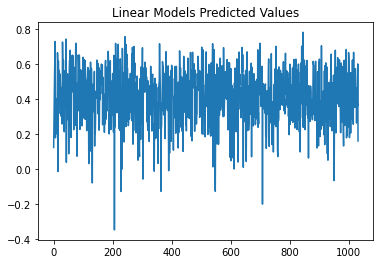

In [20]:
plt.plot(linreg.predict(Xva))
plt.title('Linear Models Predicted Values')

In [8]:
print(np.mean(linreg.predict(Xtr)))
print(np.max(linreg.predict(Xtr)))
print(np.min(linreg.predict(Xtr)))
print(mean_squared_error(linreg.predict(Xtr),Ytr))


0.4076975038136306
0.8048581129393357
-0.26579437239148085
0.18855686696488533


0.40008627642846084
1.0
0.0
0.2120981863185033


Text(0.5, 1.0, 'KNNR Predicted Values')

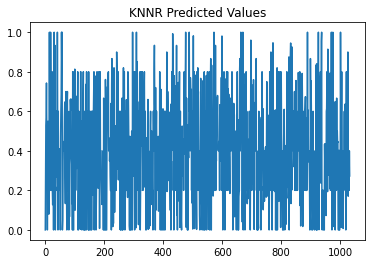

In [21]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(weights="uniform")
knn.fit(Xtr,Ytr)
#knn.score(x_test,y_test)
print(np.mean(knn.predict(Xva)))
print(np.max(knn.predict(Xva)))
print(np.min(knn.predict(Xva)))
print(mean_squared_error(knn.predict(Xva),Yva))
plt.plot(knn.predict(Xva))
plt.title('KNNR Predicted Values')

In [15]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(Xtr,Ytr)
print(mean_squared_error(rfr.predict(Xva),Yva))

/anaconda3/envs/DataSci/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.1894524436152516


ValueError: Unable to coerce to Series, length must be 1: given 1033